In [1]:
#the necessary downloads                                   WordCloud_Generator__by_Sayan_Rakshit_
!pip install wordcloud
!pip install fileupload                                    #INSTRUCTIONS!!
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload        #after running all the cells, the kernel should be shut down and 
!jupyter nbextension enable --py fileupload                # cell 1 & 2 should be run for a second time to upload a 
                                                           #text file(in the cell below)
import wordcloud
import numpy as np                                         #finally run the last cell to generate the WordCloud
from matplotlib import pyplot as plt                      
from IPython.display import display                        #WordCloud_Generator__by_Sayan_Rakshit_
import fileupload
import io
import sys

ERROR: Invalid requirement: '#INSTRUCTIONS!!'


Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\user\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\user\anaconda3\lib\site-packages\notebook\nbextensions.py", line 983, in start
    super(NBExtensionApp, self).start()
  File "C:\Users\user\anaconda3\lib\site-packages\jupyter_core\application.py", line 259, in start
    self.subapp.start()
  File "C:\Users\user\anaconda3\lib\site-packages\notebook\nbextensions.py", line 711, in start
    self.install_extensions()
  File "C:\Users\user\anaconda3\lib\site-packages\notebook\nbextensions.py", line 672, in install_extensions
    raise ValueError("Only one nbextension allow

In [2]:
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()           #the browse button should appear just below (follow steps mentioned in the above cell), browse for a .txt file

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

In [19]:
def calculate_frequencies(file_contents):
    # A string of punctuations and list uninteresting words found
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''   #we might not need this though, anyways.....
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will","for", "just"]
    
    a=""
    for i,j in enumerate(file_contents):
        if j.isalpha()==True or j.isspace()==True:    #if the encountered char is a alphabet or a space
            a+=j                                      #(all punctuations are removed and is stored in a)
    # the code below is an alternative for punctuation check (remove comments for test)
    # a=file_contents
    #for k in punctuations:
    #    a.replace(k,"")
    a=a.split()
    w=[]
    
    for wo in a:
        if wo.lower() not in uninteresting_words and wo.isalpha()==True:
            w.append(wo)        #appends only if the words are not present in uninteresting_words
    freq={}
    for wo in w:
        if wo.lower() not in freq:          #if the word(in lowercase) is not present in the newly created dict named freq
            freq[wo.lower()]=1
        else:
            freq[wo.lower()]+=1
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(freq)      #the dict is inserted in the func
    return cloud.to_array()

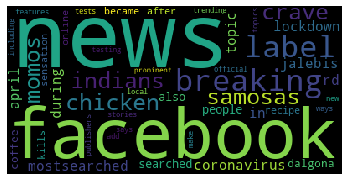

In [24]:
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()         #the word cloud might appear below......(follow instructions given in the first cell)